# COSC2789-Practical Data Science
# Assignment 2: Data Modelling
### Due date: Jan 4, 2020
### Lecturer: Vo Ngoc Yen Nhi


###

### Student: Nguyen Quang Linh
### ID: s3697110


###

#### This notebook is the submission for the assignment 2. 

This notebook is going to explore the data of books as indexed on Goodreads. From this, models can be builed to predict the average rating of these books. 

#### Acknowlegdements  
Books are scraped from a list titles the "Best Books Ever" which can be found here https://www.goodreads.com/list/show/1.Best_Books_Ever page. We thank Kaggle Community for providing this dataset and Goodreads for housing the data.


# Import Libraries

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import warnings 
import re
# seaborn theme
sns.set_theme(style="darkgrid")
style.use('fivethirtyeight')

warnings.filterwarnings("ignore")

In [2]:
# natural langue process libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# max column
pd.options.display.max_columns = None

# Task 1.1: Data Prepatation

### Detecting unicode 

In [4]:
# libraries to detect encoding 
import chardet
import glob

# for any csv file, print filename and guessing unicode detection 
print("Filename: ".ljust(45) + "Unicode: ")
for filename in glob.glob('data/*.csv'):
    with open(filename, 'rb') as rawdata:
        result = chardet.detect(rawdata.read(40000))
        
        print( filename.ljust(45),  result['encoding'])

Filename:                                    Unicode: 
data\sampleSubmission.csv                     ascii
data\X_clean.csv                              utf-8
data\X_test.csv                               utf-8
data\X_test_clean.csv                         utf-8
data\X_train.csv                              utf-8
data\y_train.csv                              ascii


This function is referred from [this](https://www.kaggle.com/rtatman/character-encodings-tips-tricks) article by Rachael Tatman (2018).

### Quick look on training dataset

In [5]:
#import training data.
X = pd.read_csv("data/X_train.csv", encoding = 'utf-8')

#print data
X.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,2533958,Frost/Nixon,https://www.goodreads.com//book/show/2533958.F...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,David Frost,https://www.goodreads.com/author/show/264173.D...,523,51,338.0,December 31st 1975,MacMillan,Frost/Nixon: Behind the Scenes of the Nixon In...,"History 42, Nonfiction 33, Politics 28, Biogra...",0230531148,9780230531147,NaN,NaN,"Richard Nixon, David Frost",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"13167112, 13167112, 29429295, 2074322, 3025937...",NaN,Including hilarious tales of the people he enc...
1,16071790,Just What Kind of Mother Are You?,https://www.goodreads.com//book/show/16071790-...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Paula Daly,https://www.goodreads.com/author/show/6175529....,10092,1236,320.0,April 28th 2013,Doubleday Canada,Just What Kind of Mother Are You?,"Mystery 136, Fiction 122, Thriller 90, Suspens...",0385680074,9780385680073,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/1?...,https://www.goodreads.com//book_link/follow/8?...,"42614702, 42614702, 42182331, 45730306, 379129...",NaN,A searing and sinister thriller for readers wh...
2,13825165,Cafenova,https://www.goodreads.com//book/show/13825165-...,(Clairmont #1),https://i.gr-assets.com/images/S/compressed.ph...,S. Jane Scheyder,https://www.goodreads.com/author/show/5871778....,769,90,318.0,November 17th 2010,Andres & Blanton,NaN,"Romance 52, Womens Fiction-Chick Lit 21, Chris...",0983031800,9780983031802,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"89959, 89959, 59091, 1996085, 25843420, 364288...",23498673,"Leaving her broken heart behind in Seattle, Ma..."
3,18061,Uncle Fred in the Springtime,https://www.goodreads.com//book/show/18061.Unc...,(Uncle Fred #1),https://i.gr-assets.com/images/S/compressed.ph...,P.G. Wodehouse,https://www.goodreads.com/author/show/7963.P_G...,4200,328,288.0,1939,Everyman,Uncle Fred in the Springtime,"Fiction 153, Humor 133, Humor-Comedy 31, Class...",1841591300,9781841591308,NaN,NaN,"Clarence Threepwood, Sebastian Beach, Rupert B...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"17910171, 17910171, 13418137, 48839090, 390885...","16241184, 16241186, 16241198",Pongo Twistleton is in a state of financial em...
4,3766428,Double Share,https://www.goodreads.com//book/show/3766428-d...,(Golden Age of the Solar Clipper #4),https://i.gr-assets.com/images/S/compressed.ph...,Nathan Lowell,https://www.goodreads.com/author/show/1048167....,4212,184,308.0,2008,Podiobooks,"Double Share (Golden Age of the Solar Clipper,...","Science Fiction 120, Space-Space Opera 37, Fic...",NaN,NaN,NaN,NaN,Ishmael Horatio Wang,Parsec Award Nominee for Best Speculative Fict...,https://www.goodreads.com//book_link/follow/17...,NaN,"53172544, 53172544, 20951387, 52856493, 444219...","2334538, 2906048, 4266110, 6963764, 10054649, ...","In his first assignment as an officer, Ishmael..."


### Quick look on testing data

In [6]:
# import testing data.
X_test = pd.read_csv("data/X_test.csv", encoding = "utf-8")
X_test.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,6333213,The Way of the Bow,https://www.goodreads.com//book/show/6333213-t...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Paulo Coelho,https://www.goodreads.com/author/show/566.Paul...,2179,180,76.0,2003,NaN,The Way of the Bow,"Fiction 39, Philosophy 15, Inspirational 6, Se...",0557010071,9.780557e+12,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"52049749, 52049749, 9242583, 50058600, 1194740...",NaN,âThe Way of the Bowâ relates the story of ...
1,493553,The Silver Child,https://www.goodreads.com//book/show/493553.Th...,(Silver Sequence #1),https://i.gr-assets.com/images/S/compressed.ph...,Cliff McNish,https://www.goodreads.com/author/show/27813.Cl...,874,84,192.0,August 1st 2003,First Avenue Editions,The Silver Child,"Fantasy 30, Young Adult 15, Science Fiction 14...",082256503X,9.780823e+12,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"13542616, 13542616, 13274082, 16072988, 58085,...","36448526, 36448541",Six children leave the comfort of their homes....
2,25574766,Il ladro di nebbia,https://www.goodreads.com//book/show/25574766-...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Lavinia Petti,https://www.goodreads.com/author/show/14006459...,219,36,412.0,May 21st 2015,Longanesi,NaN,"Fantasy 8, Fiction 3",NaN,NaN,B00WX990QQ,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/1?...,https://www.goodreads.com//book_link/follow/8?...,"9707981, 9707981, 52331839, 25663617, 22027260...",NaN,Antonio M. Fonte Ã¨ uno scrittore di enorme su...
3,133411,"Gods, Graves and Scholars: The Story of Archae...",https://www.goodreads.com//book/show/133411.Go...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"C.W. Ceram, Sophie Wilkins, E.B. Garside",https://www.goodreads.com/author/show/4651612....,1834,145,536.0,1949,Vintage,"GÃ¶tter, GrÃ¤ber und Gelehrte: Roman der ArchÃ...","History 241, Nonfiction 149, History-Archaeolo...",0394743199,9.780395e+12,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"935992, 935992, 23487060, 189589, 883503, 9611...",NaN,C.W. Ceram visualized archeology as a wonderfu...
4,64279,Heaven and Hell,https://www.goodreads.com//book/show/64279.Hea...,(North and South #3),https://i.gr-assets.com/images/S/compressed.ph...,John Jakes,https://www.goodreads.com/author/show/5768.Joh...,10369,222,781.0,1987,Signet,Heaven and Hell,"Historical-Historical Fiction 459, Fiction 194...",0451200837,9.780451e+12,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"73062, 73062, 8716, 65959, 891922, 1503274, 16...","159178, 159177",The last days of the Civil War bring no peace ...


### Quick look on target feature column 

In [7]:
# import label column (average_rating)
Y = pd.read_csv("data/y_train.csv",encoding = "ascii")
Y.head()

,id,average_rating
0,2533958,3.62
1,16071790,3.80
2,13825165,3.55
3,18061,4.24
4,3766428,4.33


# Describe the Datasets

In [8]:
print (f"Train set  has {X.shape[0]} rows and {X.shape[1]} columns")
print (f"Test set  has {X_test.shape[0]} rows and {X.shape[1]} columns")
print (f"Target feature set has {Y.shape[0]} rows")

Train set  has 41759 rows and 25 columns
Test set  has 10440 rows and 25 columns
Target feature set has 41759 rows


- It is obvious that two dataset train and set has the same numbers of columns 

- Target rows are equal to training data rows. 

## X_train Dataset

In [9]:
# training dataset info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41759 non-null  int64  
 1   title                   41759 non-null  object 
 2   link                    41759 non-null  object 
 3   series                  18647 non-null  object 
 4   cover_link              41273 non-null  object 
 5   author                  41759 non-null  object 
 6   author_link             41759 non-null  object 
 7   rating_count            41759 non-null  int64  
 8   review_count            41759 non-null  int64  
 9   number_of_pages         39886 non-null  float64
 10  date_published          41071 non-null  object 
 11  publisher               38866 non-null  object 
 12  original_title          31463 non-null  object 
 13  genre_and_votes         39521 non-null  object 
 14  isbn                    32284 non-null

## Brief Descriptions: 

- There are four numerical data columns including int64 and float64 datatypes

- The rest is all object datatype including string values

In [10]:
# describe the columsn with object datatype
X.describe(include='object').T

,count,unique,top,freq
title,41759,40047,Broken,11
link,41759,41759,https://www.goodreads.com//book/show/12701409-...,1
series,18647,18197,(Sherlock Holmes),12
cover_link,41273,41273,https://i.gr-assets.com/images/S/compressed.ph...,1
author,41759,23482,Nora Roberts,65
author_link,41759,19803,https://www.goodreads.com/author/show/3389.Ste...,82
date_published,41071,8299,2009,371
publisher,38866,9514,Vintage,457
original_title,31463,30516,Legacy,8
genre_and_votes,39521,37957,Fiction 1user,70


- It can be seen that there are large amounts of unique values for each object datatypes. 

In [11]:
# describe all numerical data columns 
X.describe().T

,count,mean,std,min,25%,50%,75%,max
id,41759.0,1.012620e+07,1.162310e+07,1.0,363987.5,6365996.0,17373246.0,54442989.0
rating_count,41759.0,1.893641e+04,1.204193e+05,0.0,346.0,2295.0,9271.0,6801077.0
review_count,41759.0,1.011812e+03,4.129329e+03,0.0,32.0,164.0,626.5,169511.0
number_of_pages,39886.0,3.293661e+02,2.509911e+02,0.0,211.0,304.0,393.0,11095.0


There are some quite jumps from 25% to max in these numerical columns.

# X_test Dataset

#### With the same flows as training data 

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10440 non-null  int64  
 1   title                   10440 non-null  object 
 2   link                    10440 non-null  object 
 3   series                  4672 non-null   object 
 4   cover_link              10319 non-null  object 
 5   author                  10440 non-null  object 
 6   author_link             10440 non-null  object 
 7   rating_count            10440 non-null  int64  
 8   review_count            10440 non-null  int64  
 9   number_of_pages         9983 non-null   float64
 10  date_published          10268 non-null  object 
 11  publisher               9697 non-null   object 
 12  original_title          7787 non-null   object 
 13  genre_and_votes         9838 non-null   object 
 14  isbn                    8032 non-null 

- In training dataset, 'isbn13' is object values. But testing dataset shows that it is float64 datatypes.
- It must be converted into object to prepare the dataset.


In [13]:
# cast 'isbn13' into object values
isbn13_float = X_test.isbn13
isbn13_float = X_test.isbn13.astype('object')

In [14]:
# review X_test info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10440 non-null  int64  
 1   title                   10440 non-null  object 
 2   link                    10440 non-null  object 
 3   series                  4672 non-null   object 
 4   cover_link              10319 non-null  object 
 5   author                  10440 non-null  object 
 6   author_link             10440 non-null  object 
 7   rating_count            10440 non-null  int64  
 8   review_count            10440 non-null  int64  
 9   number_of_pages         9983 non-null   float64
 10  date_published          10268 non-null  object 
 11  publisher               9697 non-null   object 
 12  original_title          7787 non-null   object 
 13  genre_and_votes         9838 non-null   object 
 14  isbn                    8032 non-null 

In [15]:
X_test.describe(include='object').T

,count,unique,top,freq
title,10440,10295,Perfect,4
link,10440,10440,https://www.goodreads.com//book/show/351564.Th...,1
series,4672,4627,(Star Wars Legends),5
cover_link,10319,10319,https://i.gr-assets.com/images/S/compressed.ph...,1
author,10440,7880,Nora Roberts,22
author_link,10440,7157,https://www.goodreads.com/author/show/625.Nora...,25
date_published,10268,3958,2009,91
publisher,9697,3648,Vintage,115
original_title,7787,7713,Perfect,3
genre_and_votes,9838,9605,Fiction 1user,19


In [16]:
X_test.describe()

,id,rating_count,review_count,number_of_pages,isbn13
count,1.044000e+04,1.044000e+04,10440.000000,9983.000000,7.847000e+03
mean,1.026734e+07,1.862243e+04,1017.657375,327.251227,9.773283e+12
std,1.172926e+07,9.869185e+04,3742.071556,259.859422,2.722149e+11
min,6.000000e+00,0.000000e+00,0.000000,0.000000,9.780616e+09
25%,3.583035e+05,3.210000e+02,30.000000,209.000000,9.780385e+12
50%,6.441912e+06,2.285000e+03,159.000000,304.000000,9.780747e+12
75%,1.741248e+07,9.400250e+03,607.250000,390.000000,9.781479e+12
max,5.398436e+07,2.905122e+06,102547.000000,14777.000000,9.978069e+12


# Y_train Dataset

In [17]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41759 non-null  int64  
 1   average_rating  41759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 652.6 KB


### I will drop 'id' column in this dataset in order to make Y as target label with new dataset named Y_new


In [18]:
# drop 'id' to use target variable 'average_rating'
Y_target = Y.drop('id', axis=1)

Y_target

,average_rating
0,3.62
1,3.80
2,3.55
3,4.24
4,4.33
...,...
41754,4.31
41755,4.10
41756,4.31
41757,4.45


In [19]:
Y_target.describe()

,average_rating
count,41759.000000
mean,4.019979
std,0.367900
min,0.000000
25%,3.820000
50%,4.030000
75%,4.230000
max,5.000000


# Checking Missing Values

In [20]:
## a fucntion to return total percentage of the missing values

## reference here
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total / len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

### Missing values on train 

In [21]:
missing_percentage(X)

,Total,Percent
asin,37605,90.05
awards,33256,79.64
settings,32473,77.76
characters,30782,73.71
books_in_series,24096,57.70
series,23112,55.35
original_title,10296,24.66
isbn13,10099,24.18
isbn,9475,22.69
worldcat_redirect_link,3203,7.67


### Missing values on test 

In [22]:
missing_percentage(X_test)

,Total,Percent
asin,9358,89.64
awards,8317,79.66
settings,8211,78.65
characters,7722,73.97
books_in_series,6025,57.71
series,5768,55.25
original_title,2653,25.41
isbn13,2593,24.84
isbn,2408,23.07
recommended_books,843,8.07


In [23]:
missing_percentage(Y_target)

,Total,Percent
average_rating,0,0.0


# Imputing Missing Values

There are missing values for both numerical and object datatypes. Thus, I do imputing by 2 different datatypes.

In [24]:
# imputing missing object data
missing_val_cate = ['asin',
                    'awards',
                    'settings',
                    "characters",
                    'books_in_series',
                    'series',
                    'original_title',
                    'isbn13',
                    'isbn',
                    'recommended_books',
                    'worldcat_redirect_link',
                    'publisher',
                    'genre_and_votes',
                    'description',
                    'date_published',
                    'cover_link'
                   ]

# fill missing values by'None'
def imputing_na(df):
    for i in missing_val_cate:
        df[i] = df[i].fillna('None')

In [25]:
#creat a copy of X dataset
X_new = X.copy()

In [26]:
#imputing missing values on new copy
imputing_na(X_new)

In [27]:
X_test_new = X_test.copy()

imputing_na(X_test_new)

In [28]:
# imputing missing numerical data 

# Only 'number_of_pages' has missing values
X_new['number_of_pages'] = X['number_of_pages'].fillna(0)

In [29]:
X_test_new['number_of_pages'] = X_test_new['number_of_pages'].fillna(0)

In [30]:
missing_percentage(X_new)

,Total,Percent
description,0,0.0
publisher,0,0.0
title,0,0.0
link,0,0.0
series,0,0.0
cover_link,0,0.0
author,0,0.0
author_link,0,0.0
rating_count,0,0.0
review_count,0,0.0


In [31]:
missing_percentage(X_test_new)

,Total,Percent
description,0,0.0
publisher,0,0.0
title,0,0.0
link,0,0.0
series,0,0.0
cover_link,0,0.0
author,0,0.0
author_link,0,0.0
rating_count,0,0.0
review_count,0,0.0


## Review unique values

In [32]:
X_new.nunique()/X_new.shape[0]

id                        1.000000
title                     0.959003
link                      1.000000
series                    0.435786
cover_link                0.988386
author                    0.562322
author_link               0.474221
rating_count              0.400489
review_count              0.119950
number_of_pages           0.030892
date_published            0.198760
publisher                 0.227855
original_title            0.730789
genre_and_votes           0.908978
isbn                      0.773127
isbn13                    0.758184
asin                      0.099500
settings                  0.106420
characters                0.238703
awards                    0.177902
amazon_redirect_link      1.000000
worldcat_redirect_link    0.923322
recommended_books         0.921885
books_in_series           0.391221
description               0.943509
dtype: float64

In [33]:
X_test_new.nunique()/X_test_new.shape[0]

id                        1.000000
title                     0.986111
link                      1.000000
series                    0.443295
cover_link                0.988506
author                    0.754789
author_link               0.685536
rating_count              0.613602
review_count              0.232950
number_of_pages           0.087356
date_published            0.379215
publisher                 0.349521
original_title            0.738889
genre_and_votes           0.920115
isbn                      0.769444
isbn13                    0.751724
asin                      0.103736
settings                  0.128352
characters                0.251724
awards                    0.193870
amazon_redirect_link      1.000000
worldcat_redirect_link    0.925192
recommended_books         0.918199
books_in_series           0.406226
description               0.948372
dtype: float64

# Assumptions:     

These columns are identified code of books. This will not give valuable explorations because of having many unique values. It will affect on models negatively.

- isbn: International Standard Book Number
- isbn13: 13-digit ISBN
- asin: Amazon Standard Identification Number. This column has greatly missing values as well (about 90%).

In addition, several "link" columns are dropped due to pointless insights:

- link
- amazon_redirect_link
- worldcat_redirect_link
- author_link
- cover_link

Book's information: 

These features are shown with many unique values and having few meanings to books.

- title: has many unique values along with 'original_title'
- settings: the main background of time and location of books
- characters: name of characters in books

Due to the aim of predicting the average rating of book, similar and recommended books are not relevant in this context:

- recommended_books: ID of books which are suggested
- books_in_series: books have similar series 

Both training dataset and training dataset has the same unique values then I will merge to clean consistently. 

In [34]:
# combine train and test dataset
all_data = pd.concat((X_new,X_test_new)).reset_index(drop=True)

In [35]:
len(all_data)

52199

In [36]:
all_data = all_data.drop(['title','original_title','settings','characters','isbn','isbn13','asin','link','amazon_redirect_link','worldcat_redirect_link','author_link','cover_link','recommended_books','books_in_series'],1,inplace=False)
all_data.head()

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,awards,description
0,2533958,None,David Frost,523,51,338.0,December 31st 1975,MacMillan,"History 42, Nonfiction 33, Politics 28, Biogra...",None,Including hilarious tales of the people he enc...
1,16071790,None,Paula Daly,10092,1236,320.0,April 28th 2013,Doubleday Canada,"Mystery 136, Fiction 122, Thriller 90, Suspens...",None,A searing and sinister thriller for readers wh...
2,13825165,(Clairmont #1),S. Jane Scheyder,769,90,318.0,November 17th 2010,Andres & Blanton,"Romance 52, Womens Fiction-Chick Lit 21, Chris...",None,"Leaving her broken heart behind in Seattle, Ma..."
3,18061,(Uncle Fred #1),P.G. Wodehouse,4200,328,288.0,1939,Everyman,"Fiction 153, Humor 133, Humor-Comedy 31, Class...",None,Pongo Twistleton is in a state of financial em...
4,3766428,(Golden Age of the Solar Clipper #4),Nathan Lowell,4212,184,308.0,2008,Podiobooks,"Science Fiction 120, Space-Space Opera 37, Fic...",Parsec Award Nominee for Best Speculative Fict...,"In his first assignment as an officer, Ishmael..."


# Fixing possible errors

### Cleaning functions

In [37]:
# remove all characters in ASCII table in out of order 128
def remove_non_ascii(col): 
    """
    Parameters: column
    Return: formated column without non_ascii
    """
    return ''.join(i for i in col if ord(i)<128) 

In [38]:
# clean regular expression
def clean_re(data, col):
    """
    Parameter: DataFrame, column
    Return: DataFrame with fomarted column
    """
    data[col] = data[col].str.replace(r'\W'," ")

# remove whitespaces
def clean_whitespaces(data,col):
    data[col] = [x.strip(' ') for x in data[col]]

# lowercasing column values
def lowercase(data,col):
    data[col] = data[col].str.lower()

### Handling 'series' feature

This feature is displayed as "name#number" format. But we just use the name.

In [39]:
def cleanTextInSeries(text):
    """
    Parameters: String
    Return: formated string
    """
    return text.strip('()').split('#')[0].strip()

In [40]:
def clean_series(data):
    data_copy=data.copy()
    data_copy['series'] = data_copy['series'].apply(cleanTextInSeries)
    return data_copy

In [41]:
all_data = clean_series(all_data)
all_data['series']

0                                   None
1                                   None
2                              Clairmont
3                             Uncle Fred
4        Golden Age of the Solar Clipper
                      ...               
52194                               None
52195                 Ø§ÙØ¹Ø¨ÙØ±ÙØ§Øª
52196                               None
52197                               None
52198                               None
Name: series, Length: 52199, dtype: object

In [42]:
all_data['series'] = all_data['series'].values.tolist()
all_data['series'][52195]

'Ø§Ù\x84Ø¹Ø¨Ù\x82Ø±Ù\x8aØ§Øª'

In [43]:
all_data['series']=[x.encode('latin_1').decode('utf-8',errors='ignore') for x in all_data['series']]
all_data['series'][52195]

'العبقريات'

In [44]:
# clean steps 
lowercase(all_data,'series')

clean_re(all_data,'series')

clean_whitespaces(all_data,'series')

In [45]:
all_data['series']

0                                   none
1                                   none
2                              clairmont
3                             uncle fred
4        golden age of the solar clipper
                      ...               
52194                               none
52195                          العبقريات
52196                               none
52197                               none
52198                               none
Name: series, Length: 52199, dtype: object

### Handling 'author' feature

In [46]:
#print list of authors
all_data['author'] = all_data['author'].values.tolist()
all_data['author']

0                                 David Frost
1                                  Paula Daly
2                            S. Jane Scheyder
3                              P.G. Wodehouse
4                               Nathan Lowell
                         ...                 
52194                              John Green
52195        Ø¹Ø¨Ø§Ø³ Ù
Ø­Ù
ÙØ¯ Ø§ÙØ¹ÙØ§Ø¯
52196                            Anna Seghers
52197    David Yonggi Cho, R. Whitney Manzano
52198                           Brian Katcher
Name: author, Length: 52199, dtype: object

In [47]:
#encode 'author' columns
all_data['author'] = [x.encode('latin_1').decode('utf_8') for x in all_data['author']]

In [48]:
all_data['author'][27]

'عمر عباس'

In [49]:
all_data['author']

0                                 David Frost
1                                  Paula Daly
2                            S. Jane Scheyder
3                              P.G. Wodehouse
4                               Nathan Lowell
                         ...                 
52194                              John Green
52195                       عباس محمود العقاد
52196                            Anna Seghers
52197    David Yonggi Cho, R. Whitney Manzano
52198                           Brian Katcher
Name: author, Length: 52199, dtype: object

In [50]:
# after author cleaning 
# review unique values 
all_data['author'].nunique()

27737

After cleaning, 'author' still is observed with many unique values. Then it will be dropped. 

In [51]:
#drop 'author' column
all_data = all_data.drop('author',1,inplace=False)

In [52]:
all_data.head()

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,awards,description
0,2533958,none,523,51,338.0,December 31st 1975,MacMillan,"History 42, Nonfiction 33, Politics 28, Biogra...",None,Including hilarious tales of the people he enc...
1,16071790,none,10092,1236,320.0,April 28th 2013,Doubleday Canada,"Mystery 136, Fiction 122, Thriller 90, Suspens...",None,A searing and sinister thriller for readers wh...
2,13825165,clairmont,769,90,318.0,November 17th 2010,Andres & Blanton,"Romance 52, Womens Fiction-Chick Lit 21, Chris...",None,"Leaving her broken heart behind in Seattle, Ma..."
3,18061,uncle fred,4200,328,288.0,1939,Everyman,"Fiction 153, Humor 133, Humor-Comedy 31, Class...",None,Pongo Twistleton is in a state of financial em...
4,3766428,golden age of the solar clipper,4212,184,308.0,2008,Podiobooks,"Science Fiction 120, Space-Space Opera 37, Fic...",Parsec Award Nominee for Best Speculative Fict...,"In his first assignment as an officer, Ishmael..."


### Handling 'Date_published"

In [53]:
all_data['date_published'].nunique()

9121

Because this column has large number of unique values. 

Therefore, I will group values by year. 

In [54]:
# clean text date to keep year only
def cleanTextDate(text):
    if text != text: # Check nan-value
        return text
    temp = re.findall(r"[\w']+", text)[-1]
    if temp.isnumeric():
        return float(temp)

In [55]:
# apply above function to date column 
# cast "date_published" to float type
def formatDate(data): 
    data_copy=data.copy()
    data_copy['date_published']=data_copy['date_published'].apply(cleanTextDate)
    data_copy['date_published']=data_copy['date_published'].astype('float')
    data_copy.rename(columns={'date_published':'year_published'}, inplace=True)
    return data_copy

In [56]:
all_data['date_published']

0        December 31st 1975
1           April 28th 2013
2        November 17th 2010
3                      1939
4                      2008
                ...        
52194     November 7th 2013
52195                  1945
52196                  1944
52197        March 1st 1979
52198      January 1st 2008
Name: date_published, Length: 52199, dtype: object

In [57]:
#apply function to format date_published
all_data=formatDate(all_data)

In [58]:
all_data['year_published'].head()

0    1975.0
1    2013.0
2    2010.0
3    1939.0
4    2008.0
Name: year_published, dtype: float64

In [59]:
all_data.head(2)

,id,series,rating_count,review_count,number_of_pages,year_published,publisher,genre_and_votes,awards,description
0,2533958,none,523,51,338.0,1975.0,MacMillan,"History 42, Nonfiction 33, Politics 28, Biogra...",None,Including hilarious tales of the people he enc...
1,16071790,none,10092,1236,320.0,2013.0,Doubleday Canada,"Mystery 136, Fiction 122, Thriller 90, Suspens...",None,A searing and sinister thriller for readers wh...


In [60]:
all_data['year_published'].isna().sum()

860

In [61]:
all_data['year_published'] = all_data['year_published'].fillna(0)

In [62]:
all_data['year_published'].isna().sum()

0

### Handling 'publisher" feature 

In [63]:
all_data['publisher'] = all_data['publisher'].values.tolist()
all_data['publisher'][52195]

'Ù\x86Ù\x87Ø¶Ø© Ù\x85ØµØ±'

In [64]:
all_data['publisher'] = [x.encode('latin_1').decode('utf_8',errors='ignore') for x in all_data['publisher']]


In [65]:
all_data['publisher'][52195]

'نهضة مصر'

In [66]:
all_data['publisher'].nunique()

11059

In [67]:
all_data.loc[[52195]]

,id,series,rating_count,review_count,number_of_pages,year_published,publisher,genre_and_votes,awards,description
52195,4339191,العبقريات,2149,223,152.0,1945.0,نهضة مصر,"Biography 25, History 20, Religion 16, Nonfict...",None,ÙØ¹Ø±Ø¶ Ø§ÙÙØ§ØªØ¨ ÙÙ ÙØ°Ø§ Ø§ÙØ¹Ù Ù Ø...


In [68]:
# clean possible errors
lowercase(all_data,'publisher')
clean_re(all_data,'publisher')
clean_whitespaces(all_data,'publisher')

### Handling 'genre_and_votes" feature

In [69]:
# review 'genre_and_votes' column
all_data['genre_and_votes'].unique()

array(['History 42, Nonfiction 33, Politics 28, Biography 11, North American Hi...-American History 8',
       'Mystery 136, Fiction 122, Thriller 90, Suspense 46, Mystery-Crime 43, Thriller-Mystery Thriller 42',
       'Romance 52, Womens Fiction-Chick Lit 21, Christian Fiction 17, Christian 14, Contemporary 12, Fiction 10',
       ...,
       'Fiction 95, European Literature-German Literature 49, Cultural-Germany 28',
       'Christian 10, Religion-Christianity 3, Prayer 3, Religion-Faith 3, Nonfiction 3, Religion 2',
       'Young Adult 60, Romance 27, Young Adult-Teen 17, Realistic Fiction 15, Contemporary 12, Fiction 11'],
      dtype=object)

In [70]:
# create the list of genre and votes
genre_list = all_data['genre_and_votes'].values.tolist()

In [71]:
# new empty list
genres = []

# print genres only and remove voting number
for i in genre_list:
  if (i == i):
    genres += re.findall(r"[a-zA-Z- ]+", i)

In [72]:
# counting actual unique values in new genre list
unique = set(genres)
print(len(unique))

1365


There is a large number of unique values in 'genre_and_votes'. It would be unable to seperate into each column for each genre.

I will only take out the genre having the most vote in each row. 

In [73]:
def cleanGenreText(text):
    return re.findall(r"[a-zA-Z- ]+", text)[0]

In [74]:
def cleanGenre(data):
  data_copy = data.copy()
  data_copy['genre_and_votes'] = data_copy['genre_and_votes'].apply(cleanGenreText)
  data_copy.rename(columns={'genre_and_votes':'genre'}, inplace=True)
  return data_copy

In [75]:
all_data['genre_and_votes'].head(2)

0    History 42, Nonfiction 33, Politics 28, Biogra...
1    Mystery 136, Fiction 122, Thriller 90, Suspens...
Name: genre_and_votes, dtype: object

In [76]:
all_data = cleanGenre(all_data)

In [77]:
# clean possible errors
lowercase(all_data,'genre')
clean_re(all_data,'genre')
clean_whitespaces(all_data,'genre')

In [78]:
all_data['genre']

0                history
1                mystery
2                romance
3                fiction
4        science fiction
              ...       
52194            fiction
52195          biography
52196            fiction
52197          christian
52198        young adult
Name: genre, Length: 52199, dtype: object

### Handling 'awards' feature

In [79]:
#print list of awards
all_data['awards'] = all_data['awards'].values.tolist()
all_data['awards']

0                                                     None
1                                                     None
2                                                     None
3                                                     None
4        Parsec Award Nominee for Best Speculative Fict...
                               ...                        
52194                                                 None
52195                                                 None
52196    PEN Translation Prize Nominee for Margot Betta...
52197                                                 None
52198    North Carolina Young Adult Book Award for High...
Name: awards, Length: 52199, dtype: object

In [80]:
#encoding awards column
all_data['awards'] = [x.encode('latin_1').decode('utf_8',errors='ignore') for x in all_data['awards']]

In [81]:
#clean possible errors

# #lowercasing
lowercase(all_data, 'awards')

# #strip away whitespaces
clean_whitespaces(all_data, 'awards')

#### Check unique values in awards

In [82]:
# create an empty list
award_list = []
# list of award counting
aw_count = []

for i in all_data['awards']: #for each row in award column

    if i==i:
        array = i.split(',') #spli tinto a list
        aw_count.append(len(array))
        for a in array:
            award_list.append(a.split('(')[0].split('for')[0].strip())
        else:
            aw_count.append(0)

In [83]:
#unique values in award column
len(set(award_list))

2445

There are too many unique values in 'award so it is impossible to split into each feature. 

I will count the number of award which the book took from. 

In [84]:
# split text (string) into a list and return length 
def cleanTextAward(text):
    if text =='none':       #if missing values, return '0'
        return 0
    return len(text.split(","))

In [85]:
#count the number of received award for each book 
def countAward(data):
    data_copy=data.copy()
    data_copy['awards'] = data_copy['awards'].apply(cleanTextAward)
    return data_copy

In [86]:
all_data['awards'][94]

'michael l. printz award (2018), rhode island teen book award nominee (2019), lincoln award nominee (2019), goodreads choice award nominee for young adult fiction (2017), hea noorteraamat (2018)'

In [87]:
all_data = countAward(all_data)

In [88]:
all_data['awards'][94]

5

In [89]:
all_data.head()

,id,series,rating_count,review_count,number_of_pages,year_published,publisher,genre,awards,description
0,2533958,none,523,51,338.0,1975.0,macmillan,history,0,Including hilarious tales of the people he enc...
1,16071790,none,10092,1236,320.0,2013.0,doubleday canada,mystery,0,A searing and sinister thriller for readers wh...
2,13825165,clairmont,769,90,318.0,2010.0,andres blanton,romance,0,"Leaving her broken heart behind in Seattle, Ma..."
3,18061,uncle fred,4200,328,288.0,1939.0,everyman,fiction,0,Pongo Twistleton is in a state of financial em...
4,3766428,golden age of the solar clipper,4212,184,308.0,2008.0,podiobooks,science fiction,2,"In his first assignment as an officer, Ishmael..."


### Handling 'description' feature

In [90]:
all_data['description'][52195]

'Ù\x8aØ¹Ø±Ø¶ Ø§Ù\x84Ù\x83Ø§ØªØ¨ Ù\x81Ù\x8a Ù\x87Ø°Ø§ Ø§Ù\x84Ø¹Ù\x85Ù\x84 Ø§Ù\x84Ø¹Ø¨Ù\x82Ø±Ù\x8aØ© Ø§Ù\x84Ù\x81Ø°Ø© Ù\x84ØªÙ\x84Ù\x83 Ø§Ù\x84Ø´Ø®ØµÙ\x8aØ© Ø§Ù\x84ØªÙ\x8a Ø£Ø«Ø±Øª Ø§Ù\x84Ø\xadÙ\x8aØ§Ø© Ø§Ù\x84Ø¥Ø³Ù\x84Ø§Ù\x85Ù\x8aØ© Ø¨Ù\x85Ù\x86Ø§Ù\x82Ø¨Ù\x87Ø§ Ø§Ù\x84Ù\x85ØªØ¹Ø¯Ø¯Ø©Ø\x8c Ù\x85Ù\x88Ø¶Ø\xadÙ\x8bØ§ Ù\x86Ø´Ø£ØªÙ\x87 Ù\x88Ø¥Ø³Ù\x84Ø§Ù\x85Ù\x87 Ù\x88Ø\xadÙ\x8aØ§ØªÙ\x87 Ø¨Ù\x8aÙ\x86 Ø§Ù\x84Ø¨Ø§Ø¯Ù\x8aØ© Ù\x88Ø§Ù\x84Ø\xadØ±Ø¨Ø\x8c Ù\x88Ù\x86Ø³Ø¨Ù\x87 Ø§Ù\x84Ù\x82Ø¨Ù\x84Ù\x8a Ù\x88Ù\x85Ø³Ù\x8aØ±ØªÙ\x87 Ù\x85Ø¹ Ø§Ù\x84Ø±Ø³Ù\x88Ù\x84 Ù\x88Ø¯Ù\x88Ø±Ù\x87 Ù\x81Ù\x8a Ø\xadØ±Ù\x88Ø¨ Ø§Ù\x84Ø±Ø¯Ø© Ù\x88Ø§Ù\x84Ù\x81ØªÙ\x88Ø\xadØ§Øª Ø§Ù\x84Ø¥Ø³Ù\x84Ø§Ù\x85Ù\x8aØ© Ù\x88Ø¹Ø²Ù\x84Ù\x87Ø\x8c Ù\x85Ø\xadØ¯Ø¯Ù\x8bØ§ Ø¹Ù\x86Ø§ØµØ± Ø¹Ø¨Ù\x82Ø±Ù\x8aØªÙ\x87 Ø§Ù\x84Ø\xadØ±Ø¨Ù\x8aØ© Ù\x88Ù\x85Ù\x81ØªØ§Ø\xad Ø´Ø®ØµÙ\x8aØªÙ\x87 Ù\x88Ù\x86Ù\x87Ø§Ù\x8aØªÙ\x87'

In [91]:
#encoding awards column
all_data['description'] = [x.encode('latin_1').decode('utf_8',errors='ignore') for x in all_data['description']]

In [92]:
all_data['description'][52195]

'يعرض الكاتب في هذا العمل العبقرية الفذة لتلك الشخصية التي أثرت الحياة الإسلامية بمناقبها المتعددة، موضحًا نشأته وإسلامه وحياته بين البادية والحرب، ونسبه القبلي ومسيرته مع الرسول ودوره في حروب الردة والفتوحات الإسلامية وعزله، محددًا عناصر عبقريته الحربية ومفتاح شخصيته ونهايته'

In [93]:
lowercase(all_data,'description')

clean_re(all_data,'description')

clean_whitespaces(all_data,'description')

In [94]:
# def is_ascii(data):
#     for Str in data:
#         if Str.isascii()==False: print(Str)

In [95]:
all_data['description']


0        including hilarious tales of the people he enc...
1        a searing and sinister thriller for readers wh...
2        leaving her broken heart behind in seattle  ma...
3        pongo twistleton is in a state of financial em...
4        in his first assignment as an officer  ishmael...
                               ...                        
52194    john green   the collection includes five nove...
52195    يعرض الكاتب في هذا العمل العبقرية الفذة لتلك ا...
52196    marseille im sommer 1940  am rande europas ver...
52197    paul yonggi cho  pastor of the world s largest...
52198    seventeen year old leon sanders has a mug that...
Name: description, Length: 52199, dtype: object

## Split all_data back into train and test

In [96]:
from sklearn.model_selection import train_test_split

X, X_test = train_test_split(all_data, test_size = .2, random_state = 0)

In [97]:
len(X)

41759

In [98]:
X.head(2)

,id,series,rating_count,review_count,number_of_pages,year_published,publisher,genre,awards,description
32756,77427,aubrey maturin,15128,640,379.0,1973.0,w w norton,historical historical fiction,0,amid sights and smells of the indian subcontin...
17106,550821,none,5175,291,384.0,1993.0,ballantine books,fiction,1,comic and tragic unique and outlandish crazy...


In [99]:
len(X_test)

10440

In [100]:
X.to_csv("data/X_clean.csv")

In [101]:
X_test.to_csv("data/X_test_clean.csv")

# Task 1.2: Data Exploration

I am going to emphasize on **average_rating** scrapped to Y as target feature for the models. Thererfore, I am going to visualize it by 3 plot charts. 

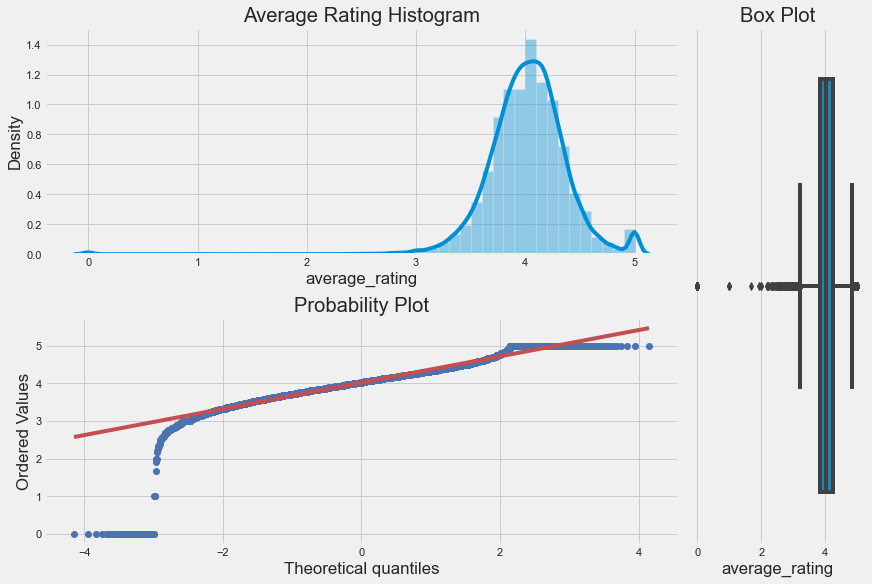

In [102]:
def plotting_3_chart(df, feature):
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Average Rating Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
    
    
plotting_3_chart(Y_target,'average_rating')

From these 3 charts, it can be observed several things about target variable 'average_rating' 
 - The target variable **average_rating** is noramlly distributed.
 - Eventually, the target variable has some outliers.

In [103]:
#skewness
print("Avg Rating Skewness: " + str(Y['average_rating'].skew()))

Avg Rating Skewness: -1.836198722141747


## Visualizing numerical data

#### Histogram function

In [104]:
def histogram(df, feature):
    
     ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(20,12))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title(str(feature)+' Histogram ')
    ax1.legend(facecolor='white', fontsize=11)
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

#### Scatterplot function

In [105]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    plt.legend(facecolor='white', fontsize=11)
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

## Review Count

No handles with labels found to put in legend.


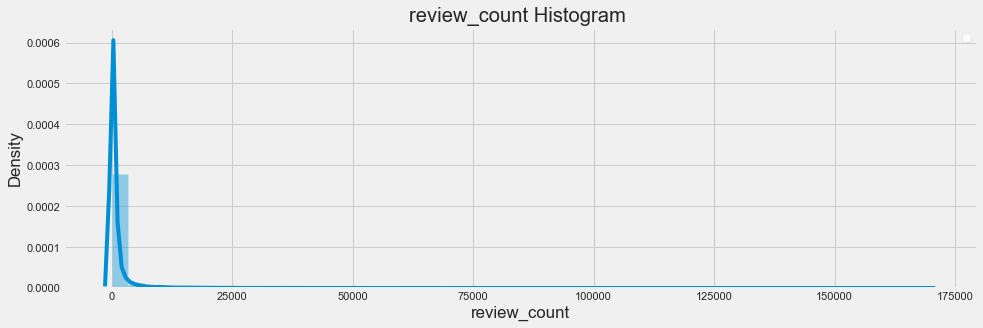

In [106]:
histogram(X, 'review_count')

In [107]:
print("Review Count Skewness: " + str(X['review_count'].skew()))

Review Count Skewness: 13.42431792970402


## Rating Count

No handles with labels found to put in legend.


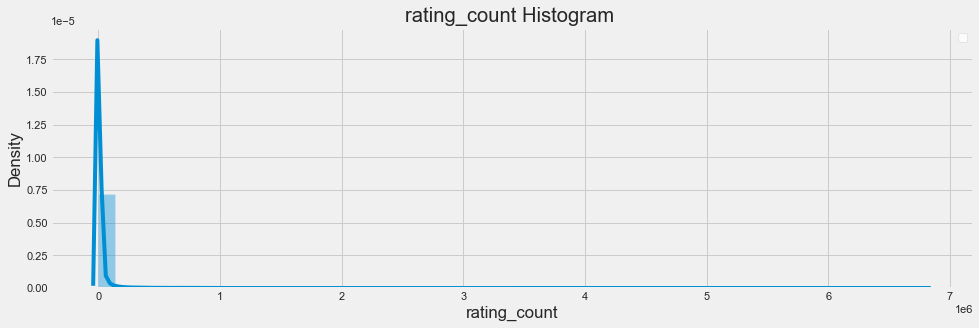

In [108]:
histogram(X, 'rating_count')

In [109]:
print("Rating Count Skewness: " + str(X['rating_count'].skew()))

Rating Count Skewness: 26.003731676838736


## Number of pages Count

No handles with labels found to put in legend.


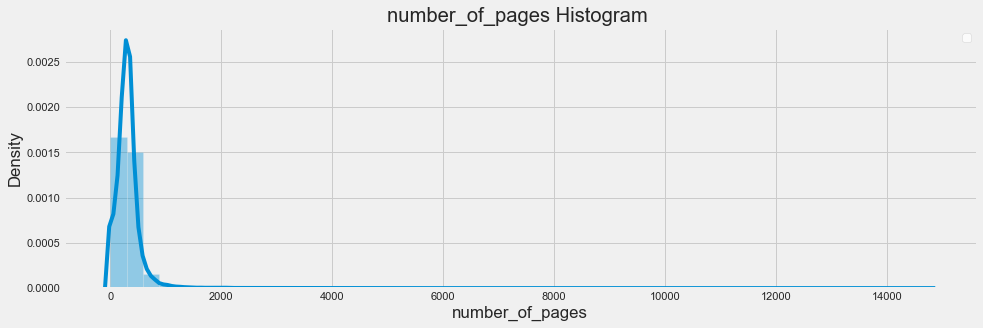

In [110]:
histogram(X, 'number_of_pages')

In [111]:
print("Book Pages Skewness: " + str(X['number_of_pages'].skew()))

Book Pages Skewness: 11.708073131496688


### Observation

I used histogram to check numerical data's distribution in training dataset. 

It can be observed that numerical data has quite positive skewess. This will affect on the efficience of linear regression. 

## Avg Rating vs Page Num

No handles with labels found to put in legend.


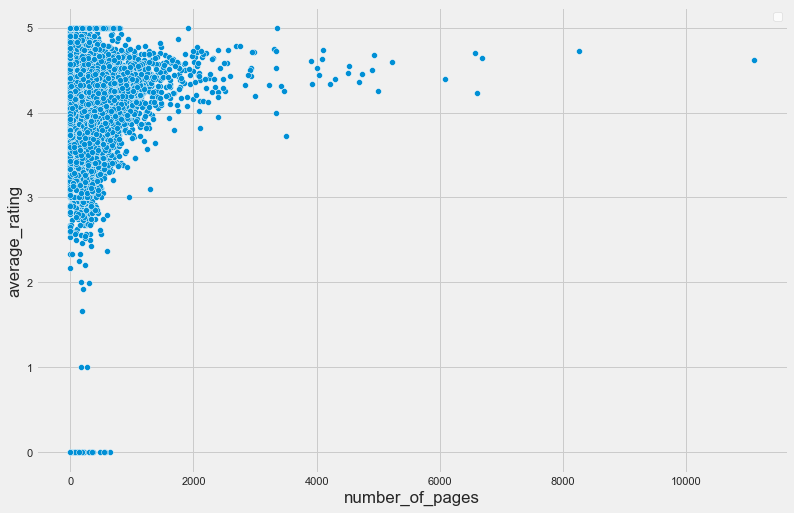

In [112]:
customized_scatterplot(Y.average_rating, X.number_of_pages)

## Avg Rating vs Rating Count  

No handles with labels found to put in legend.


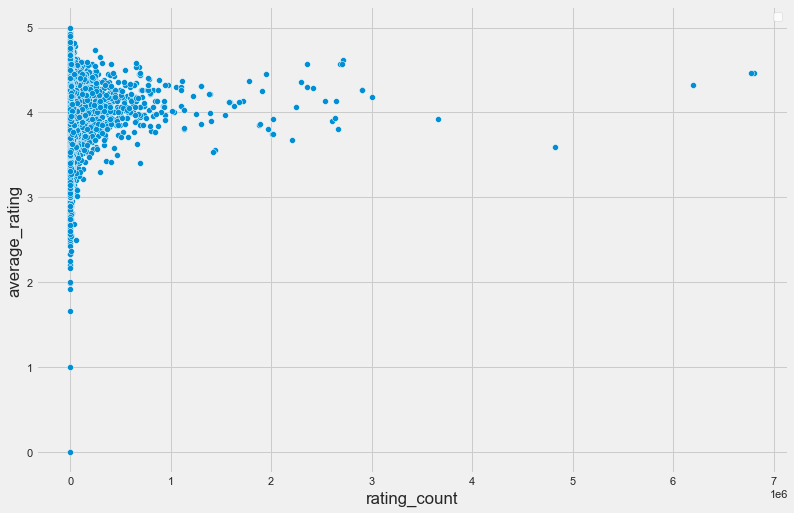

In [113]:
customized_scatterplot(Y.average_rating, X.rating_count)

## Avg Rating vs Awards 

No handles with labels found to put in legend.


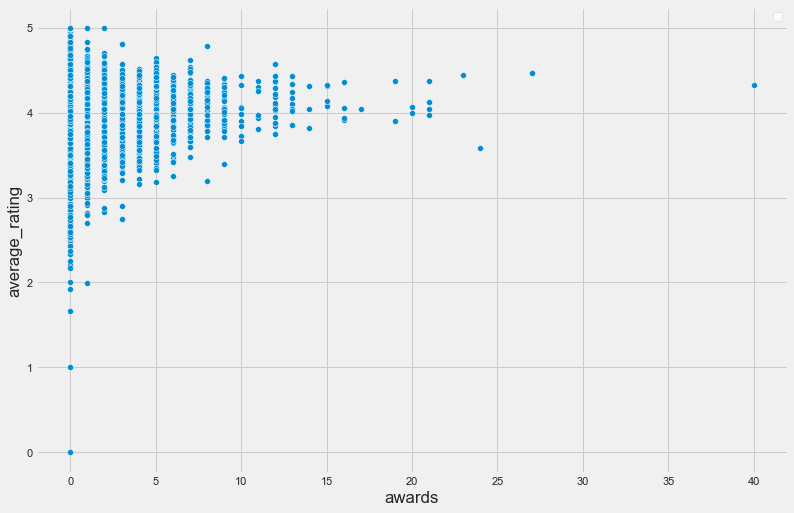

In [114]:
customized_scatterplot(Y.average_rating, X.awards)

## Avg Rating vs Year Published 

No handles with labels found to put in legend.


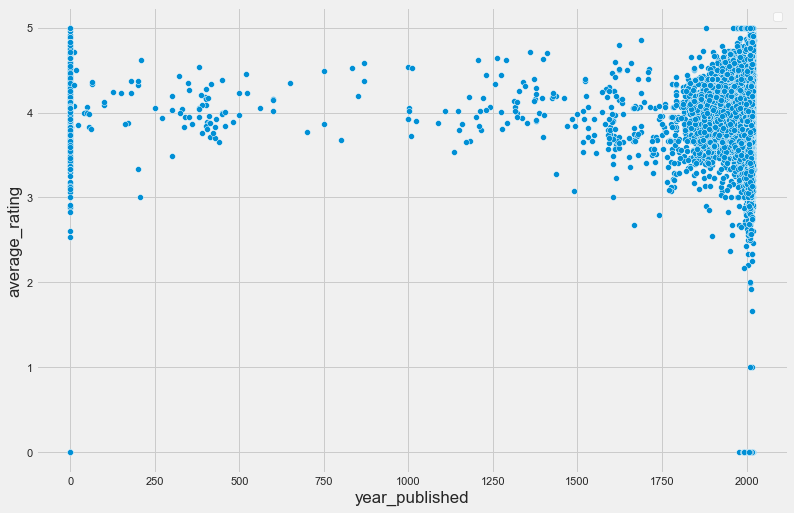

In [115]:
customized_scatterplot(Y.average_rating, X.year_published) 

No handles with labels found to put in legend.


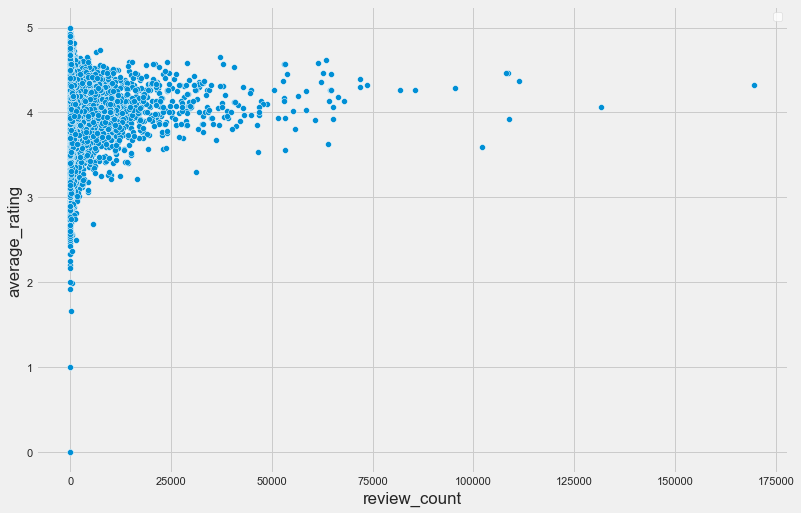

In [116]:
customized_scatterplot(Y.average_rating, X.review_count) 

Eventhough scatterplot is not the most suitable one to visualize categorical data, I use scatterplot graph to demonstrate apparent relationship between the target variable and other features, 

## Observations: 

- There are many outliers in two above scatterplots due to the skewness of numerical data

- Therefore, these graphs seem not follow any trends. I need to handle these skewness in dataset.

# Task 2: Feature Engineering 

# Fixing skewness 

In [117]:
X

,id,series,rating_count,review_count,number_of_pages,year_published,publisher,genre,awards,description
32756,77427,aubrey maturin,15128,640,379.0,1973.0,w w norton,historical historical fiction,0,amid sights and smells of the indian subcontin...
17106,550821,none,5175,291,384.0,1993.0,ballantine books,fiction,1,comic and tragic unique and outlandish crazy...
19927,32848471,none,34014,3387,322.0,2017.0,everafter romance,romance,1,the night i met drew jagger he d just broken ...
51085,13282921,none,125,29,342.0,2011.0,دار الآداب,novels,0,حولت على الفتاة الأولى السويدية خبر وتعليق سر...
38604,221274,resident evil,1104,46,288.0,2004.0,pocket star,horror,0,the hive a subterranean genetic research faci...
...,...,...,...,...,...,...,...,...,...,...
21243,1523598,none,66,16,244.0,1861.0,wildside press,classics,0,cloister and the hearth volume iii the cloi...
45891,12830430,none,332,25,510.0,2004.0,albert bonniers förlag,poetry,1,med sitt särpräglade metaforrika språk har tom...
42613,9031163,crusade,1177,123,544.0,2011.0,simon schuster children s publishing,paranormal vampires,0,there is a fine line between love and sacrific...
43567,22772589,none,8,5,141.0,2014.0,wickid pissa books,none,0,frank flutie is a lexicographer who has waged ...


In [118]:
X_skew_feats = X[['review_count','rating_count']]

In [119]:
X_skew_feats 

,review_count,rating_count
32756,640,15128
17106,291,5175
19927,3387,34014
51085,29,125
38604,46,1104
...,...,...
21243,16,66
45891,25,332
42613,123,1177
43567,5,8


In [120]:
from scipy.stats import skew

In [121]:
numeric_feats = X.dtypes[X.dtypes != "object"].index

skewed_feats = X[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

rating_count       26.002798
review_count       13.423836
number_of_pages    11.707653
awards              6.587659
id                  1.205455
year_published     -6.780670
dtype: float64

In [132]:
## Fixing Skewed features using boxcox transformation. 
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    

    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(X)

ValueError: array must not contain infs or NaNs

No handles with labels found to put in legend.


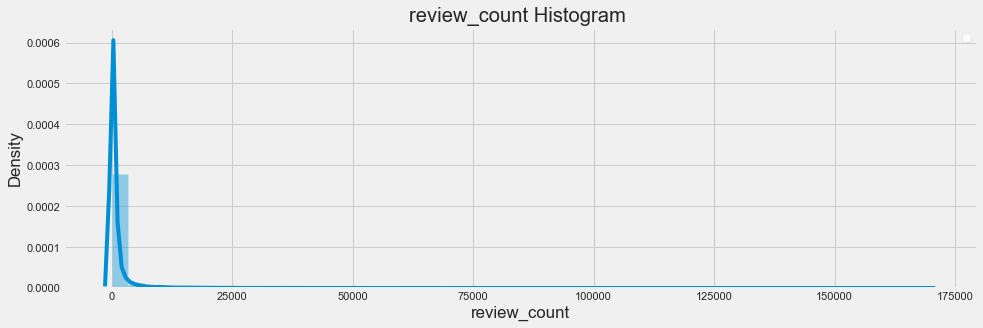

In [131]:
histogram(X, 'review_count')

In [124]:
print("Review Count Skewness: " + str(X['review_count'].skew()))

Review Count Skewness: 13.42431792970402


No handles with labels found to put in legend.


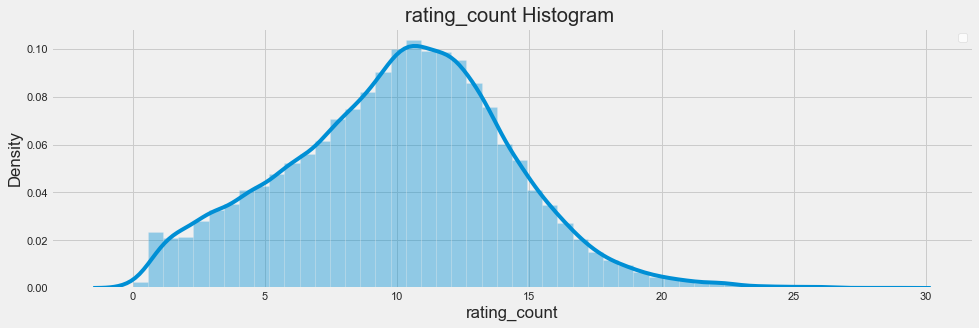

In [125]:
histogram(X_skew_feats, 'rating_count')

In [126]:
print("Rating Count Skewness: " + str(X['rating_count'].skew()))

Rating Count Skewness: 26.003731676838736


# Combine X and y

In [127]:
df = pd.concat((X, test)).reset_index(drop = True)


NameError: name 'test' is not defined

In [ ]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [ ]:
# correlation analysis
corrMatrix = X.corr()
corrMatrix.style.background_gradient(cmap='Greens')

In [ ]:
X_demo = df[['rating_count','review_count','number_of_pages']]

In [ ]:
missing_percentage(df)

# Feature Engineering

In [ ]:
top_genre =  all_data['genre'].value_counts().loc[lambda x: x>=6]
top_genre

In [ ]:
top_aw =  all_data['awards'].value_counts().loc[lambda x: x>=6]

len(top_aw)
top_aw

In [ ]:
other_aw = all_data['awards'].value_counts().loc[lambda x: x < 6]

other_aw.index.tolist()

In [ ]:
aw_other_list = [x.replace(x, "Others") for x in aw_other_list]

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.target_encoder.TargetEncoder(cols=['series'])

encoder.fit(X_new['series'], Y_target)

In [ ]:
series = X_new['series']

In [ ]:
series = encoder.transform(series)

In [ ]:
series = series.round()
series

In [ ]:
# plt.figure(figsize=(20,15))
# sns.barplot(series_count.values, series_count.index, alpha=0.9)

# plt.show()

In [ ]:
# lower, tokenize and stem
def text_tokenize(text):
    text = text.lower()
    word_tokens = nltk.word_tokenize(text) 
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])
    filtered_sentence = [w for w in word_tokens if not w in stop_words]  
    stems = []
    for item in filtered_sentence:
        stems.append(PorterStemmer().stem(item))
    return stems

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=text_tokenize)

In [ ]:
#demo dataset
demo = all_data.copy()
demo

In [ ]:
demo = vectorizer.fit_transform(demo['description'])

In [ ]:
demo.shape

In [ ]:
demo = demo.toarray()

In [ ]:
column_list = vectorizer.get_feature_names()

In [ ]:
demo = pd.DataFrame(demo, columns=column_list)

In [ ]:
demo

In [ ]:
# labelEncode = preprocessing.LabelEncoder()

# all_data['series'] = labelEncode.fit_transform(all_data['series'])

In [ ]:
#view unique entries 

def unique (data,col):
    print(str(col)+': ', data[col].unique(), '\n'*2, " Len:",len(data[col].unique()))

In [ ]:
unique(X_new, series_bot)

In [ ]:
# unique(all_data, 'settings')

# demo feature select

In [ ]:
# final_fea = pd.get_dummies(X_new).reset_index(drop=True)

final_feature = pd.get_dummies(all_data, columns=['genre'])
final_feature.head()

In [ ]:
print("Skewness: " + str(Y['average_rating'].skew()))
print("Kurtosis: " + str(Y['average_rating'].kurt()))

In [ ]:
Y['average_rating'] = np.log1p(Y["average_rating"])

plotting_3_chart(Y, 'average_rating')

# Multiple Linear

In [ ]:
X_mul = np.array(X[['review_count','rating_count']])

In [ ]:
X_mul

In [ ]:
Y_one = np.array(Y['average_rating']) 
Y_one 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_mul, Y, test_size=0.2, random_state=0)

In [ ]:
np.random.seed(0)

In [ ]:
X_train

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
print('Root Mean Squared Error (RMSE): %.2f'
     % metrics.mean_squared_error(y_val,y_pred))

print('Mean Absolute Error (MAE): %.2f'
      % metrics.mean_absolute_error(y_val, y_pred))

# The coefficient of determination: 1 is perfect prediction
# Accuracy of the model 
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_val, y_pred))

In [ ]:
X_new.hist(figsize=(20,15))
plt.show()

In [ ]:
Y1 = Y[['average_rating']]
# correlation analysis
df = pd.concat([X,Y1],axis=1)

corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='Greens')

In [ ]:
(df.corr()**2)['average_rating'].sort_values(ascending=False)[1:]

In [ ]:
len(df.average_rating)

In [ ]:
df_demo = df[df.average_rating >= 1.4]
print(len(df_demo))

In [ ]:
df_demo['average_rating'].hist(figsize=(20,15))
plt.show()

In [ ]:
print("Skewness: "+ str(df_demo['average_rating'].skew()))

### Note: Need to clear outliers for more neutral distributed

In [ ]:
X_demo = X_new[X_new.review_count <= 30]

In [ ]:
print("Skewness: "+ str(X_demo['review_count'].skew()))

In [ ]:
# sns.displot(X_new,x = 'rating_count',height=20)
X_demo.hist(figsize=(20,15))

In [ ]:
df1 = df[['title','author', 'average_rating']]

In [ ]:
demo = df1.sort_values('average_rating', ascending=False).set_index('title')
demo[:10]

In [ ]:
demo_au = df1.sort_values('average_rating', ascending=False).set_index('author')
demo_au[:10]

In [ ]:
X_new.head(3)

# Textual Data draft

In [ ]:
from empath import Empath
lexicon = Empath()